In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        label_path = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))
        
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        
        with open(label_path, 'r') as f:
            label = int(f.readline().split()[0])  # Leer la primera línea y obtener la clase
        
        return image, label

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(images_dir='train/images', labels_dir='train/labels', transform=transform)
valid_dataset = CustomDataset(images_dir='valid/images', labels_dir='valid/labels', transform=transform)
test_dataset = CustomDataset(images_dir='test/images', labels_dir='test/labels', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import numpy as np

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Aumentar la tasa de abandono

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Cargar las clases desde el archivo classes.txt
with open('classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

num_classes = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(num_classes).to(device)

Epoch [1/50], Train Loss: 2.4650
Epoch [1/50], Validation Loss: 2.2989
Epoch [2/50], Train Loss: 2.2125
Epoch [2/50], Validation Loss: 2.2902
Epoch [3/50], Train Loss: 2.0810
Epoch [3/50], Validation Loss: 2.1039
Predicted: tensor([4, 5, 3, 3], device='cuda:0')
GroundTruth: tensor([4, 6, 6, 5], device='cuda:0')


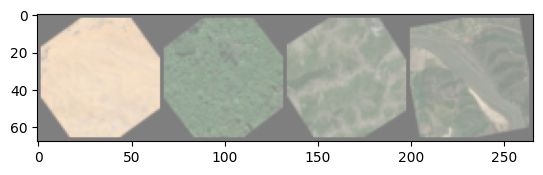

Epoch [4/50], Train Loss: 1.9986
Epoch [4/50], Validation Loss: 2.0609
Epoch [5/50], Train Loss: 1.8806
Epoch [5/50], Validation Loss: 1.9332
Epoch [6/50], Train Loss: 1.8233
Epoch [6/50], Validation Loss: 1.9045
Predicted: tensor([2, 0, 3, 5], device='cuda:0')
GroundTruth: tensor([1, 0, 3, 0], device='cuda:0')


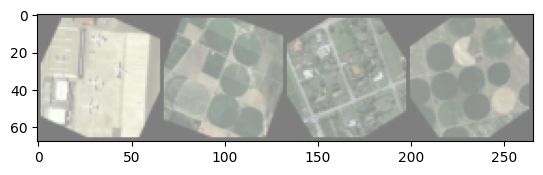

Epoch [7/50], Train Loss: 1.8284
Epoch [7/50], Validation Loss: 1.9022
Epoch [8/50], Train Loss: 1.7412
Epoch [8/50], Validation Loss: 1.8314
Epoch [9/50], Train Loss: 1.6770
Epoch [9/50], Validation Loss: 1.7999
Predicted: tensor([5, 0, 6, 4], device='cuda:0')
GroundTruth: tensor([9, 7, 5, 4], device='cuda:0')


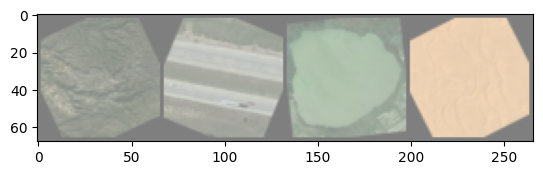

Epoch [10/50], Train Loss: 1.6262
Epoch [10/50], Validation Loss: 1.7877
Epoch [11/50], Train Loss: 1.6437
Epoch [11/50], Validation Loss: 1.7708
Epoch [12/50], Train Loss: 1.5393
Epoch [12/50], Validation Loss: 1.7802
Predicted: tensor([4, 3, 3, 3], device='cuda:0')
GroundTruth: tensor([4, 3, 3, 3], device='cuda:0')


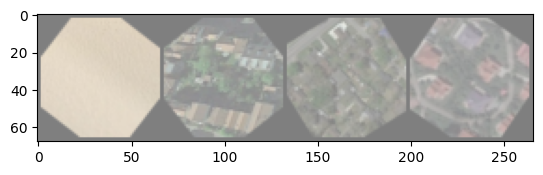

Epoch [13/50], Train Loss: 1.5419
Epoch [13/50], Validation Loss: 1.6973
Epoch [14/50], Train Loss: 1.4729
Epoch [14/50], Validation Loss: 1.6976
Epoch [15/50], Train Loss: 1.4183
Epoch [15/50], Validation Loss: 1.6978
Predicted: tensor([ 1,  0, 10,  1], device='cuda:0')
GroundTruth: tensor([ 1,  0, 10,  1], device='cuda:0')


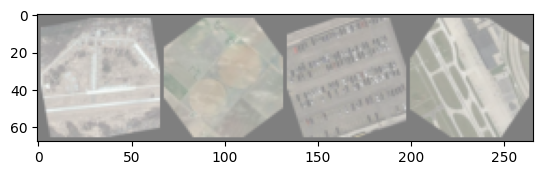

Epoch [16/50], Train Loss: 1.4116
Epoch [16/50], Validation Loss: 1.6632
Epoch [17/50], Train Loss: 1.4079
Epoch [17/50], Validation Loss: 1.7292
Epoch [18/50], Train Loss: 1.3933
Epoch [18/50], Validation Loss: 1.6383
Predicted: tensor([ 6,  5, 10,  3], device='cuda:0')
GroundTruth: tensor([ 6,  6, 10,  3], device='cuda:0')


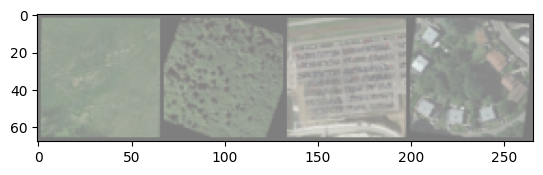

Epoch [19/50], Train Loss: 1.3657
Epoch [19/50], Validation Loss: 1.6699
Epoch [20/50], Train Loss: 1.4164
Epoch [20/50], Validation Loss: 1.7136
Epoch [21/50], Train Loss: 1.3526
Epoch [21/50], Validation Loss: 1.7269
Predicted: tensor([3, 0, 2, 3], device='cuda:0')
GroundTruth: tensor([3, 0, 4, 3], device='cuda:0')


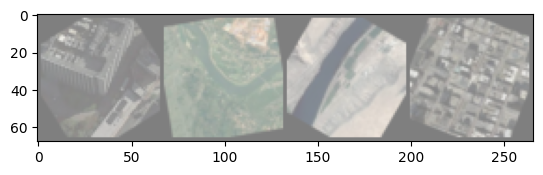

Epoch [22/50], Train Loss: 1.3123
Epoch [22/50], Validation Loss: 1.6190
Epoch [23/50], Train Loss: 1.3208
Epoch [23/50], Validation Loss: 1.6923
Epoch [24/50], Train Loss: 1.2937
Epoch [24/50], Validation Loss: 1.7180
Predicted: tensor([10,  3,  1,  0], device='cuda:0')
GroundTruth: tensor([12,  3,  3,  0], device='cuda:0')


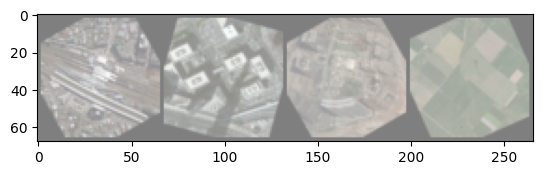

Epoch [25/50], Train Loss: 1.2596
Epoch [25/50], Validation Loss: 1.7683
Epoch [26/50], Train Loss: 1.2579
Epoch [26/50], Validation Loss: 1.6660
Epoch [27/50], Train Loss: 1.1727
Epoch [27/50], Validation Loss: 1.6638
Early stopping!


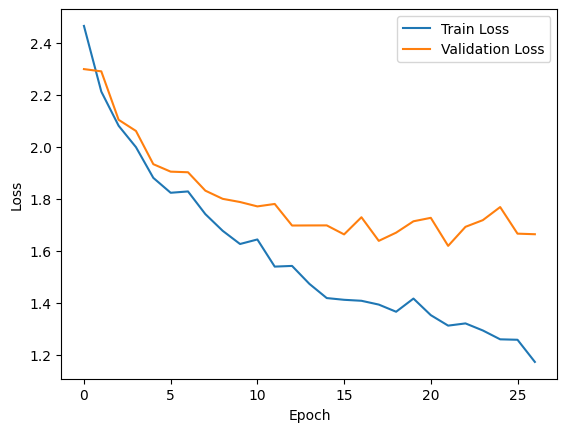

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Añadir weight_decay para L2 regularization

num_epochs = 50
best_valid_loss = float('inf')
patience = 5
train_losses = []
valid_losses = []
trigger_times = 0

def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Mover los datos a CUDA
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
    
    # Calcular la pérdida de validación
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
    valid_loss /= len(valid_loader)
    valid_losses.append(valid_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {valid_loss:.4f}')
    
    # Ajustar la tasa de aprendizaje
    scheduler.step(valid_loss)
    
    # Early Stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break
    
    # Visualizar las imágenes y predicciones cada 3 épocas
    if (epoch + 1) % 3 == 0:
        with torch.no_grad():
            inputs, labels = next(iter(train_loader))
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            print(f'Predicted: {predicted[:4]}')
            print(f'GroundTruth: {labels[:4]}')
            imshow(torchvision.utils.make_grid(inputs.cpu()[:4]))

# Graficar las pérdidas de entrenamiento y validación
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model.eval()
valid_loss = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Mover los datos a CUDA
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()
valid_loss /= len(valid_loader)
print(f'Validation Loss: {valid_loss:.4f}')

Validation Loss: 1.6767


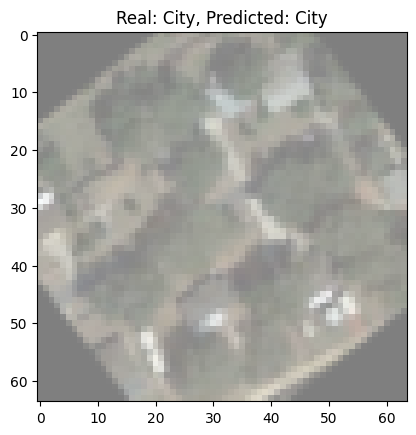

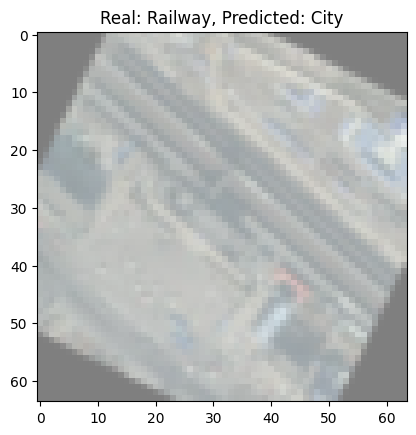

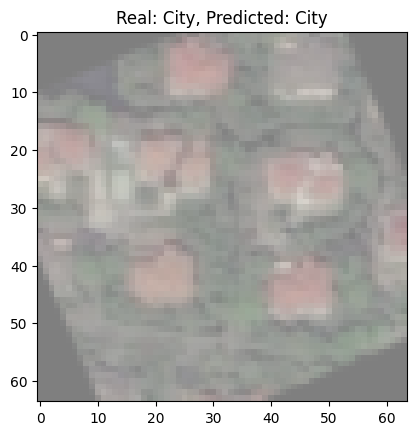

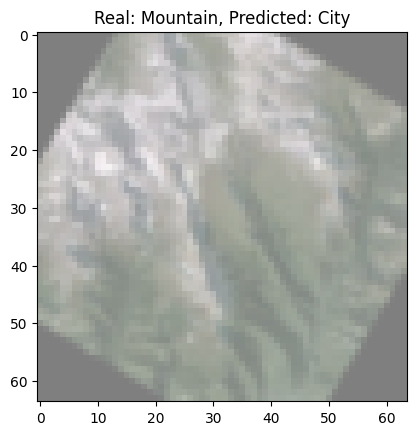

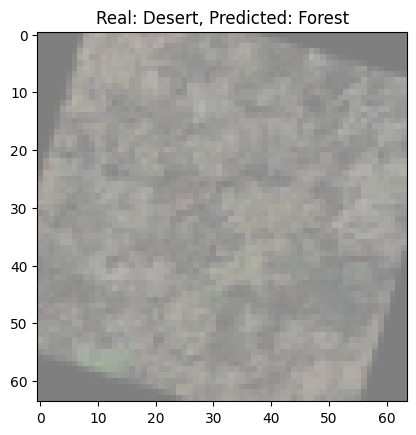

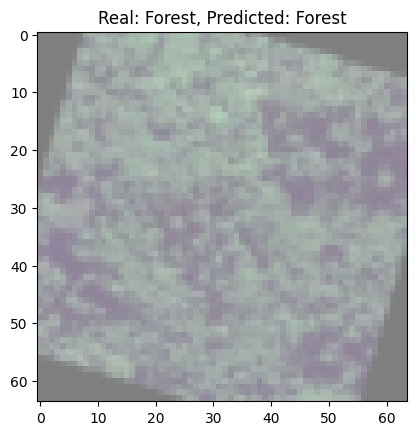

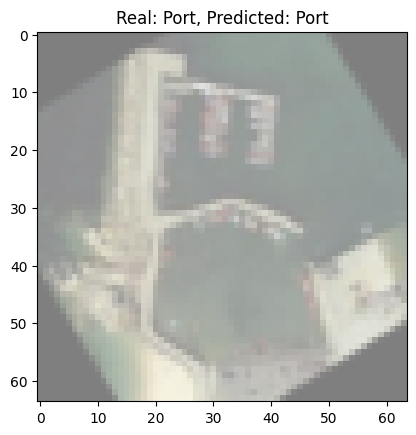

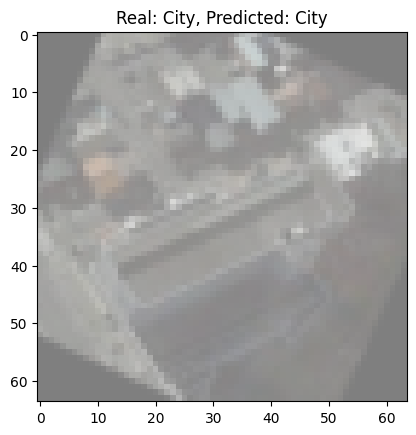

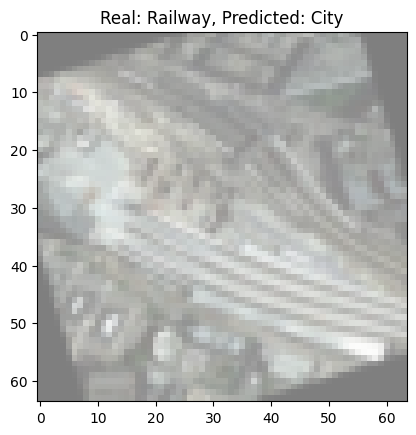

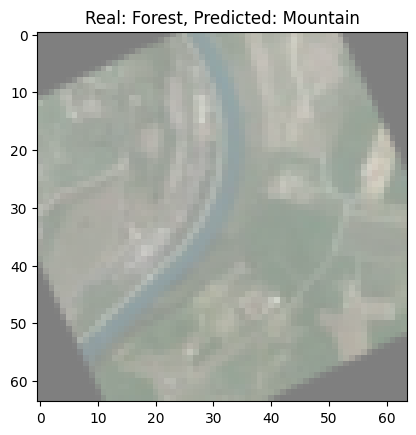

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    img = img / 2 + 0.5  # Desnormalizar si es necesario
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()

# Seleccionar 10 imágenes aleatorias del conjunto de validación
model.eval()
images, labels = next(iter(valid_loader))
images, labels = images.to(device), labels.to(device)

# Seleccionar 10 índices aleatorios
indices = np.random.choice(len(images), 10, replace=False)
selected_images = images[indices]
selected_labels = labels[indices]

# Obtener las predicciones del modelo
with torch.no_grad():
    outputs = model(selected_images)
    _, predicted = torch.max(outputs, 1)

# Mostrar las imágenes junto con las etiquetas reales y predichas
for i in range(10):
    imshow(selected_images[i].cpu(), f'Real: {classes[selected_labels[i]]}, Predicted: {classes[predicted[i]]}')